In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('/Users/michaeltan/house-prices-advanced-regression-techniques/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Text(0.5, 1.0, 'House Price Distributions')

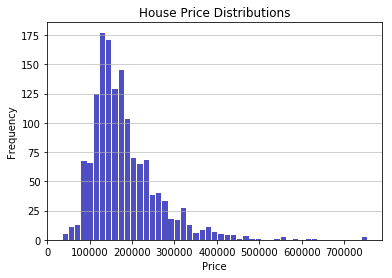

In [6]:
#Plot histogram of clicks per user\n",
n, bins, patches = plt.hist(x=df_train['SalePrice'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('House Price Distributions')

In [11]:
g = stats.gmean(df_train['SalePrice'])
h = stats.hmean(df_train['SalePrice'])
t = stats.tmean(df_train['SalePrice'])
m = stats.mode(df_train['SalePrice'])
med = np.median(df_train['SalePrice'])
gperc = stats.percentileofscore(df_train['SalePrice'], g)
hperc = stats.percentileofscore(df_train['SalePrice'], h)
tperc = stats.percentileofscore(df_train['SalePrice'], t)
medperc = stats.percentileofscore(df_train['SalePrice'], med)
mperc = stats.percentileofscore(df_train['SalePrice'], m.mode)

print('geometric mean: ', int(g), '       percentile: ', int(gperc))
print('harmonic mean: ', int(h),'         percentile: ', int(hperc))
print('trimmed tail mean: ', int(t),'    percentile: ', int(tperc))
print('median: ', int(med),'               percentile: ', int(medperc))
print('mode: ', int(m.mode),'                  percentile: ', int(mperc))


geometric mean:  166716        percentile:  52
harmonic mean:  153992          percentile:  44
trimmed tail mean:  180921     percentile:  61
median:  163000                percentile:  50
mode:  140000                   percentile:  34


In [12]:
print(stats.percentileofscore(df_train['SalePrice'], 163000))

50.034246575342465


In [16]:
#Check how which columns are missing the most data
Alley = df_train['Alley']


In [36]:
for i in df_train.columns:
    print (df_train           .columns[i], df_train[i].isnull().sum())



0
0
0
259
0
0
1369
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
8
8
0
0
0
37
37
38
37
0
38
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
690
81
81
81
0
0
81
81
0
0
0
0
0
0
0
1453
1179
1406
0
0
0
0
0
0


0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21      False
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1430     True
1431     True
1432    False
1433     True
1434     True
1435     True
1436     True
1437     True
1438     True
1439     True
1440     True
1441     True
1442     True
1443     True
1444     True
1445     True
1446     True
1447     True
1448     True
1449     True
1450     True
1451     True
1452     True
1453     True
1454    False
1455     True
1456     True
1457     True
1458     True
1459     True
Name: Alley, Length: 1460, dtype: bool